In [364]:
import pandas as pd
import  numpy as np

train  = pd.read_csv("train.csv", encoding="big5")
test   = pd.read_csv("test.csv", encoding="big5" ,header=None)
train_set =[]#month , day ,time ,kind
train_pm25 =[]
for i in range (12):
    train_set.append([])
    train_pm25.append([])
    for j in range (20):
        train_set[i].append([])
        train_pm25[i].append([])
        for k in range (24):
            train_set[i][j].append([])
            train_pm25[i][j].append([])
            for l in range (18):
                train_set[i][j][k].append([])
index = 0
for i in range (12):
    for j in range (20):
        for k in range (24):
            for l in range (18):
                if(train[str(k)][index]=="NR"):
                    train_set[i][j][k][l] = 0
                else:
                    train_set[i][j][k][l]=train[str(k)][index]
                if(l == 9):
                    train_pm25[i][j][k]=train[str(k)][index]
                index+=1
            index-=18
        index+=18

train_set2 = [] #make 20days continus
train_p     = [] # pm25 continus

for i in range (12):
    train_set2.append([])
    train_p.append([])
    index=0
    for j in range (20):
        for k in range (24):
            train_set2[i].append([])
            train_p[i].append([])
            for l in range (18):
                train_set2[i][index].append(float(train_set[i][j][k][l]))
                if(l==9):
                    train_p[i][index].append(float(train_set[i][j][k][l]))
            index+=1  

In [250]:
train_feat = [] #9 days data mean
train_label = [] #10 day data
train_feat_2d =[]
train_label_2d=[]
for i in range (12):
    train_feat.append([])
    for j in range (472):
        train_feat[i].append([])
        for l in range (18):
            temp_mean = 0
            for m in range (j,j+9):
                temp_mean+=train_set2[i][m][l]
            temp_mean/=9
            train_feat[i][j].append(temp_mean)
            if(l==9):
                train_feat_2d.append(temp_mean)
for i in range (12):
    train_label.append([])
    for j in range (9,480):
        train_label[i].append(train_p[i][j])
        train_label_2d.append(train_p[i][j][0])
        if(train_p[i][j]==0):
            print(i,j)
            
                
                

In [502]:
def loss_function_sum (num_data,w,b):
    loss=0
    w1=0
    b1=0
    for i in range (num_data):
        y=w*train_feat_2d[i]+b
        loss+=((y-train_label_2d[i])*(y-train_label_2d[i]))
        w1+=2*(train_label_2d[i]-y)*(-train_feat_2d[i])
        b1+=2*(train_label_2d[i]-y)*(-1)
    
    w1=w1*(-0.0000001)+w
    b1=b1*(-0.0001)+b
    lossfordraw.append(loss)
    return loss,w1,b1
def loss_validation (w,b):
    loss=0
    for i in range (3000,4000):
        y=w*train_feat_2d[i]+b
        loss+=((y-train_label_2d[i])*(y-train_label_2d[i]))
    return loss


In [505]:
print(loss_validation ( 1.009276402601133,-0.46058739145782013))
print(loss_validation (0.9255787327167102 ,1.9663611814096795))


152178.20503477272
145698.60652580755


99 0.9255787327167102 1.9663611814096795


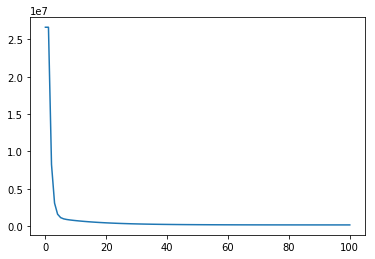

In [503]:
import matplotlib.pyplot as plt
lossfordraw=[]
time=0
w=5
b=5
w1=w
b1=b
(lmin,w1,b1)=loss_function_sum(1000,w,b)
for i in range (100):
    (l,w1,b1)=loss_function_sum(1000,w,b)
    w=w1
    b=b1
    if(l<lmin):
        time=i
        wmin=w1
        bmin=b1   
print(time,wmin,bmin)
plt.plot(lossfordraw)
plt.savefig('loss.jpg')

In [444]:
test_feat= []
test_label=[]
test_title =[]
row=9
for i in range(260):
    pm25_mean=0
    for j in range(2,11):
        pm25_mean+=float(test[j][row])
    test_feat.append(pm25_mean/9)
    row+=18
test_title.append("id")
test_label.append("value")
for i in range (260):
    test_title.append("id_"+str(i))
    test_label.append(test_feat[i]*0.8692665473842838+7.600521282753978)
df =pd.DataFrame(test_label,test_title)
df.to_csv("my_submission.csv",header=False)